In [1]:
from importlib import reload
import sys
import os
sys.path.append(os.path.abspath('../../'))
import util
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import backtester
reload(backtester)

<module 'backtester' from 'c:\\Users\\joshu\\Documents\\Github\\Prosperity-3\\Testing\\backtester\\__init__.py'>

In [2]:
r3_prices = backtester.utils.load_all_price_data(3)

Data for Round 3, Day -2 not found. Skipping.
Data for Round 3, Day -1 not found. Skipping.
Found data file at ../../../Prosperity 3 Data/Round 3/prices_round_3_day_0.csv
Found data file at ../../../Prosperity 3 Data/Round 3/prices_round_3_day_1.csv
Found data file at ../../../Prosperity 3 Data/Round 3/prices_round_3_day_2.csv
Data for Round 3, Day 3 not found. Skipping.
Data for Round 3, Day 4 not found. Skipping.


In [3]:
vc_prices = backtester.utils.get_vwap(r3_prices, 'VOLCANIC_ROCK')

In [4]:
# Filter products that start with VOLCANIC_ROCK_VOUCHER
volcanic_vouchers = r3_prices[r3_prices['product'].str.startswith('VOLCANIC_ROCK_VOUCHER', na=False)]

# Display unique voucher products
print("Volcanic Rock Voucher products found:")
print(volcanic_vouchers['product'].unique())

# Display basic info about the filtered data
print("\nDataset info:")
print(volcanic_vouchers.info())

# Show first few rows
print("\nFirst few rows:")
display(volcanic_vouchers.head())

Volcanic Rock Voucher products found:
['VOLCANIC_ROCK_VOUCHER_10500' 'VOLCANIC_ROCK_VOUCHER_10000'
 'VOLCANIC_ROCK_VOUCHER_9750' 'VOLCANIC_ROCK_VOUCHER_9500'
 'VOLCANIC_ROCK_VOUCHER_10250']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 0 to 2999900
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   day              150000 non-null  int64  
 1   product          150000 non-null  object 
 2   bid_price_1      146737 non-null  float64
 3   bid_volume_1     146737 non-null  float64
 4   bid_price_2      918 non-null     float64
 5   bid_volume_2     918 non-null     float64
 6   bid_price_3      0 non-null       float64
 7   bid_volume_3     0 non-null       float64
 8   ask_price_1      150000 non-null  int64  
 9   ask_volume_1     150000 non-null  int64  
 10  ask_price_2      3750 non-null    float64
 11  ask_volume_2     3750 non-null    float64
 12  ask_price_3      11 non-n

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0
0,0,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0
0,0,VOLCANIC_ROCK_VOUCHER_9750,754.0,19.0,NaN,NaN,NaN,NaN,755,19,NaN,NaN,NaN,NaN,754.5,0.0
0,0,VOLCANIC_ROCK_VOUCHER_9500,1003.0,19.0,NaN,NaN,NaN,NaN,1004,19,NaN,NaN,NaN,NaN,1003.5,0.0
0,0,VOLCANIC_ROCK_VOUCHER_10250,273.0,19.0,NaN,NaN,NaN,NaN,274,19,NaN,NaN,NaN,NaN,273.5,0.0


In [5]:
# Filter volcanic rock vouchers and create new DataFrame with .copy()
volcanic_vouchers = r3_prices[r3_prices['product'].str.startswith('VOLCANIC_ROCK_VOUCHER_', na=False)].copy()

# Extract strike price from product name using .loc
volcanic_vouchers.loc[:, 'strike_price'] = volcanic_vouchers['product'].str.extract(r'VOLCANIC_ROCK_VOUCHER_(\d+)').astype(float)

# Keep only relevant columns
columns_to_keep = ['product', 'strike_price',
    'bid_price_1', 'bid_volume_1',
    'ask_price_1', 'ask_volume_1'
]

volcanic_vouchers_clean = volcanic_vouchers[columns_to_keep].copy()

# Calculate mid price using .loc
volcanic_vouchers_clean.loc[:, 'mid_price'] = (volcanic_vouchers_clean['bid_price_1'] + volcanic_vouchers_clean['ask_price_1']) / 2

# Sort by timestamp and strike price
volcanic_vouchers_clean = volcanic_vouchers_clean.sort_values(['timestamp', 'strike_price'])

# Display the first few rows
print("First few rows of the cleaned dataset:")
display(volcanic_vouchers_clean.head())

# Show summary of unique strike prices
print("\nUnique strike prices found:")
print(volcanic_vouchers_clean['strike_price'].unique())

First few rows of the cleaned dataset:


,product,strike_price,bid_price_1,bid_volume_1,ask_price_1,ask_volume_1,mid_price
timestamp,,,,,,,
0,VOLCANIC_ROCK_VOUCHER_9500,9500.0,1003.0,19.0,1004,19,1003.5
0,VOLCANIC_ROCK_VOUCHER_9750,9750.0,754.0,19.0,755,19,754.5
0,VOLCANIC_ROCK_VOUCHER_10000,10000.0,505.0,19.0,506,19,505.5
0,VOLCANIC_ROCK_VOUCHER_10250,10250.0,273.0,19.0,274,19,273.5
0,VOLCANIC_ROCK_VOUCHER_10500,10500.0,99.0,19.0,100,19,99.5



Unique strike prices found:
[ 9500.  9750. 10000. 10250. 10500.]


In [6]:
# Filter volcanic rock vouchers and create new DataFrame with .copy()
volcanic_vouchers = r3_prices[r3_prices['product'].str.startswith('VOLCANIC_ROCK_VOUCHER_', na=False)].copy()

# Extract strike price from product name using .loc
volcanic_vouchers.loc[:, 'strike_price'] = volcanic_vouchers['product'].str.extract(r'VOLCANIC_ROCK_VOUCHER_(\d+)').astype(float)

# Keep only relevant columns
columns_to_keep = ['product', 'strike_price',
    'bid_price_1', 'bid_volume_1',
    'ask_price_1', 'ask_volume_1'
]

volcanic_vouchers_clean = volcanic_vouchers[columns_to_keep].copy()

# Calculate mid price using .loc
volcanic_vouchers_clean.loc[:, 'mid_price'] = (volcanic_vouchers_clean['bid_price_1'] + volcanic_vouchers_clean['ask_price_1']) / 2

# Add underlying price (VWAP of VOLCANIC_ROCK)
volcanic_vouchers_clean.loc[:, 'underlying_price'] = vc_prices

# Sort by timestamp and strike price
volcanic_vouchers_clean = volcanic_vouchers_clean.sort_values(['timestamp', 'strike_price'])

# Display the first few rows
print("First few rows of the cleaned dataset:")
display(volcanic_vouchers_clean.head())

# Show summary statistics
print("\nSummary of the dataset:")
print(volcanic_vouchers_clean.describe())

# Show unique strike prices
print("\nUnique strike prices found:")
print(volcanic_vouchers_clean['strike_price'].unique())

First few rows of the cleaned dataset:


,product,strike_price,bid_price_1,bid_volume_1,ask_price_1,ask_volume_1,mid_price,underlying_price
timestamp,,,,,,,,
0,VOLCANIC_ROCK_VOUCHER_9500,9500.0,1003.0,19.0,1004,19,1003.5,10503.143902
0,VOLCANIC_ROCK_VOUCHER_9750,9750.0,754.0,19.0,755,19,754.5,10503.143902
0,VOLCANIC_ROCK_VOUCHER_10000,10000.0,505.0,19.0,506,19,505.5,10503.143902
0,VOLCANIC_ROCK_VOUCHER_10250,10250.0,273.0,19.0,274,19,273.5,10503.143902
0,VOLCANIC_ROCK_VOUCHER_10500,10500.0,99.0,19.0,100,19,99.5,10503.143902



Summary of the dataset:
        strike_price    bid_price_1   bid_volume_1   ask_price_1  \
count  150000.000000  146737.000000  146737.000000  150000.00000   
mean    10000.000000     389.128345      16.282526     389.91168   
std       353.554569     310.669985       5.401931     310.65930   
min      9500.000000       1.000000       0.000000       1.00000   
25%      9750.000000      81.000000      13.000000      82.00000   
50%     10000.000000     357.000000      16.000000     358.00000   
75%     10250.000000     665.000000      19.000000     665.25000   
max     10500.000000    1085.000000      46.000000    1086.00000   

        ask_volume_1      mid_price  underlying_price  
count  150000.000000  146737.000000     150000.000000  
mean       15.721680     389.655942      10332.010245  
std         3.761373     310.692313        141.715048  
min         1.000000       1.500000      10028.500000  
25%        13.000000      81.500000      10199.169313  
50%        16.000000     3

In [7]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import os
import sys
from IPython.display import clear_output
from time import time

def clear_terminal():
    """Clear terminal in both notebook and console environments."""
    clear_output(wait=True)  # For Jupyter notebooks
    os.system('cls' if os.name == 'nt' else 'clear')  # For terminal

def print_progress(current, total, start_time, implied_vol_count):
    """Print progress information."""
    elapsed_time = time() - start_time
    progress = (current + 1) / total * 100
    success_rate = (implied_vol_count / (current + 1)) * 100 if current > 0 else 0
    
    clear_terminal()
    print(f"Processing row {current + 1} of {total} ({progress:.1f}%)")
    print(f"Elapsed time: {elapsed_time:.1f} seconds")
    print(f"Successful calculations: {implied_vol_count} ({success_rate:.1f}%)")
    if current > 0:
        remaining_time = (elapsed_time / (current + 1)) * (total - (current + 1))
        print(f"Estimated time remaining: {remaining_time:.1f} seconds")
    sys.stdout.flush()



# Rest of the functions remain the same...

In [8]:
def black_scholes_call_price(S, K, T, r, sigma, q=0):
    """Calculate Black-Scholes call option price with input validation."""
    if not all(x > 0 for x in [S, K, T, sigma]):
        return float('nan')
    
    try:
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        return price if np.isfinite(price) else float('nan')
    except:
        return float('nan')

def vega(S, K, T, r, sigma, q=0):
    """Calculate option vega with input validation."""
    if not all(x > 0 for x in [S, K, T, sigma]):
        return float('nan')
    
    try:
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        v = S * np.exp(-q * T) * np.sqrt(T) * norm.pdf(d1)
        return v if np.isfinite(v) else float('nan')
    except:
        return float('nan')

def implied_volatility(option_market_price, S, K, T, r, q=0, tol=1e-5, max_iterations=100):
    """Calculate implied volatility with robust error handling."""
    # Input validation
    if not all(x > 0 for x in [option_market_price, S, K, T]):
        return None
    
    # Initial guess for sigma
    sigma = np.sqrt(2 * np.pi / T) * option_market_price / S
    
    if not 0.0001 < sigma < 5:  # Reasonable bounds for initial guess
        sigma = 0.3  # Fall back to typical volatility
    
    for i in range(max_iterations):
        try:
            price = black_scholes_call_price(S, K, T, r, sigma, q)
            v = vega(S, K, T, r, sigma, q)
            
            # Check for invalid calculations
            if np.isnan(price) or np.isnan(v) or abs(v) < 1e-10:
                return None
            
            diff = price - option_market_price
            if abs(diff) < tol:
                return sigma if 0.0001 <= sigma <= 5 else None
            
            sigma = sigma - diff / v
            
            # Break if sigma goes out of reasonable bounds
            if not 0.0001 <= sigma <= 5:
                return None
                
        except:
            return None
    
    return None  # Failed to converge

def calculate_time_to_expiry(timestamp):
    """Calculate time to expiry in years."""
    SEVEN_MILLION = 7_000_000
    T = (SEVEN_MILLION - timestamp) / SEVEN_MILLION
    return T if T > 0 else 0

def calculate_implied_vol(bid_price, ask_price, underlying_price, strike_price, timestamp, r=0.0):
    """Calculate implied volatility with enhanced validation."""
    # Basic input validation
    if not all(pd.notna(x) for x in [bid_price, ask_price, underlying_price, strike_price]):
        return None
    
    if not all(x > 0 for x in [bid_price, ask_price, underlying_price, strike_price]):
        return None
    
    # Calculate mid price
    market_price = (bid_price + ask_price) / 2
    
    # Calculate time to expiry
    T = calculate_time_to_expiry(timestamp)
    
    # Additional validation
    if T <= 0 or market_price <= 0:
        return None
        
    return implied_volatility(
        option_market_price=market_price,
        S=underlying_price,
        K=strike_price,
        T=T,
        r=r,
        tol=1e-5,
        max_iterations=100
    )

def add_implied_volatility(df):
    """Add implied volatility column to DataFrame with progress tracking."""
    total_rows = len(df)
    start_time = time()
    implied_vol_count = 0
    results = []
    
    print(f"Starting implied volatility calculations for {total_rows} rows...")
    
    for idx, row in df.iterrows():
        vol = calculate_implied_vol(
            row['bid_price_1'],
            row['ask_price_1'],
            row['underlying_price'],
            row['strike_price'],
            idx,
            r=0.0
        )
        
        if vol is not None:
            implied_vol_count += 1
            
        results.append(vol)
        
        if (idx + 1) % 100 == 0 or idx == total_rows - 1:  # Update every 100 rows
            print_progress(idx, total_rows, start_time, implied_vol_count)
    
    df['implied_vol'] = results
    
    # Final summary
    clear_terminal()
    print("\nCalculation completed!")
    print(f"Total rows processed: {total_rows}")
    print(f"Successful calculations: {implied_vol_count}")
    print(f"Success rate: {(implied_vol_count/total_rows)*100:.1f}%")
    print(f"Total time: {time() - start_time:.1f} seconds")
    
    return df

In [9]:
# Make sure to import required libraries
import numpy as np
from scipy.stats import norm
import pandas as pd

# Apply to your DataFrame
df = add_implied_volatility(volcanic_vouchers_clean)


Calculation completed!
Total rows processed: 150000
Successful calculations: 132558
Success rate: 88.4%
Total time: 131.2 seconds


In [10]:
df

,product,strike_price,bid_price_1,bid_volume_1,ask_price_1,ask_volume_1,mid_price,underlying_price,implied_vol
timestamp,,,,,,,,,
0,VOLCANIC_ROCK_VOUCHER_9500,9500.0,1003.0,19.0,1004,19,1003.5,10503.143902,0.036805
0,VOLCANIC_ROCK_VOUCHER_9750,9750.0,754.0,19.0,755,19,754.5,10503.143902,0.032878
0,VOLCANIC_ROCK_VOUCHER_10000,10000.0,505.0,19.0,506,19,505.5,10503.143902,0.024931
0,VOLCANIC_ROCK_VOUCHER_10250,10250.0,273.0,19.0,274,19,273.5,10503.143902,0.024103
0,VOLCANIC_ROCK_VOUCHER_10500,10500.0,99.0,19.0,100,19,99.5,10503.143902,0.023373
...,...,...,...,...,...,...,...,...,...
2999900,VOLCANIC_ROCK_VOUCHER_9500,9500.0,666.0,20.0,667,20,666.5,10166.500000,0.017658
2999900,VOLCANIC_ROCK_VOUCHER_9750,9750.0,417.0,20.0,418,20,417.5,10166.500000,0.025426
2999900,VOLCANIC_ROCK_VOUCHER_10000,10000.0,180.0,20.0,181,20,180.5,10166.500000,0.021914


<Axes: xlabel='timestamp'>

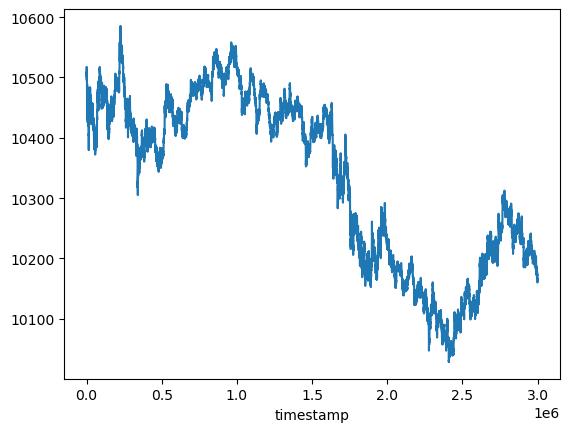

In [17]:
vc_prices.plot()

<Axes: xlabel='timestamp'>

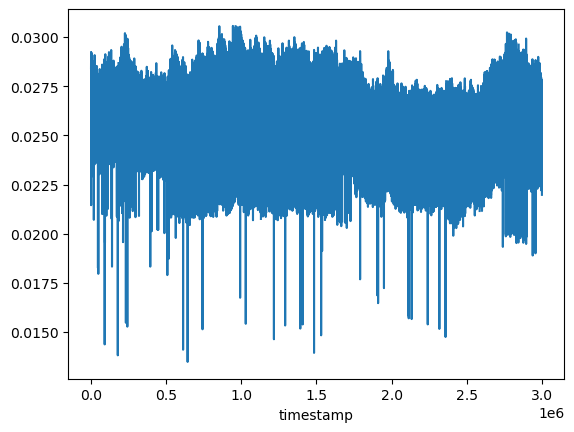

In [16]:
df.reset_index().groupby('timestamp')['implied_vol'].mean().plot()